# **Forcasting**

### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')



### Data

In [2]:
dataframe = pd.read_csv('Cacao Production (DDN).csv')
dataframe.head()

,Date,Production
0,1/1/2010,60.92
1,1/4/2010,78.35
2,1/7/2010,106.59
3,1/10/2010,86.97
4,1/1/2011,63.26


In [3]:
dataframe.shape

(57, 2)

In [4]:
print(f"Date range of harvested cacao fruits from - {dataframe.loc[:,'Date'][0]} to {dataframe.loc[:,'Date'][len(dataframe)-1]}")

Date range of harvested cacao fruits from - 1/1/2010 to 1/1/2024


In [5]:
date = pd.date_range(start='1/1/2010', end='1/1/2024', freq='QS-JAN')
date

DatetimeIndex(['2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
               '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
               '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
               '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01',
      

In [6]:
dataframe['Quarter'] = date
if 'Date' in dataframe.columns:
    dataframe.drop('Date', axis=1, inplace=True)
if 'month' in dataframe.columns:
    dataframe.drop('month', axis=1, inplace=True)
dataframe = dataframe.set_index('Quarter')
dataframe.head()

,Production
Quarter,
2010-01-01,60.92
2010-04-01,78.35
2010-07-01,106.59
2010-10-01,86.97
2011-01-01,63.26


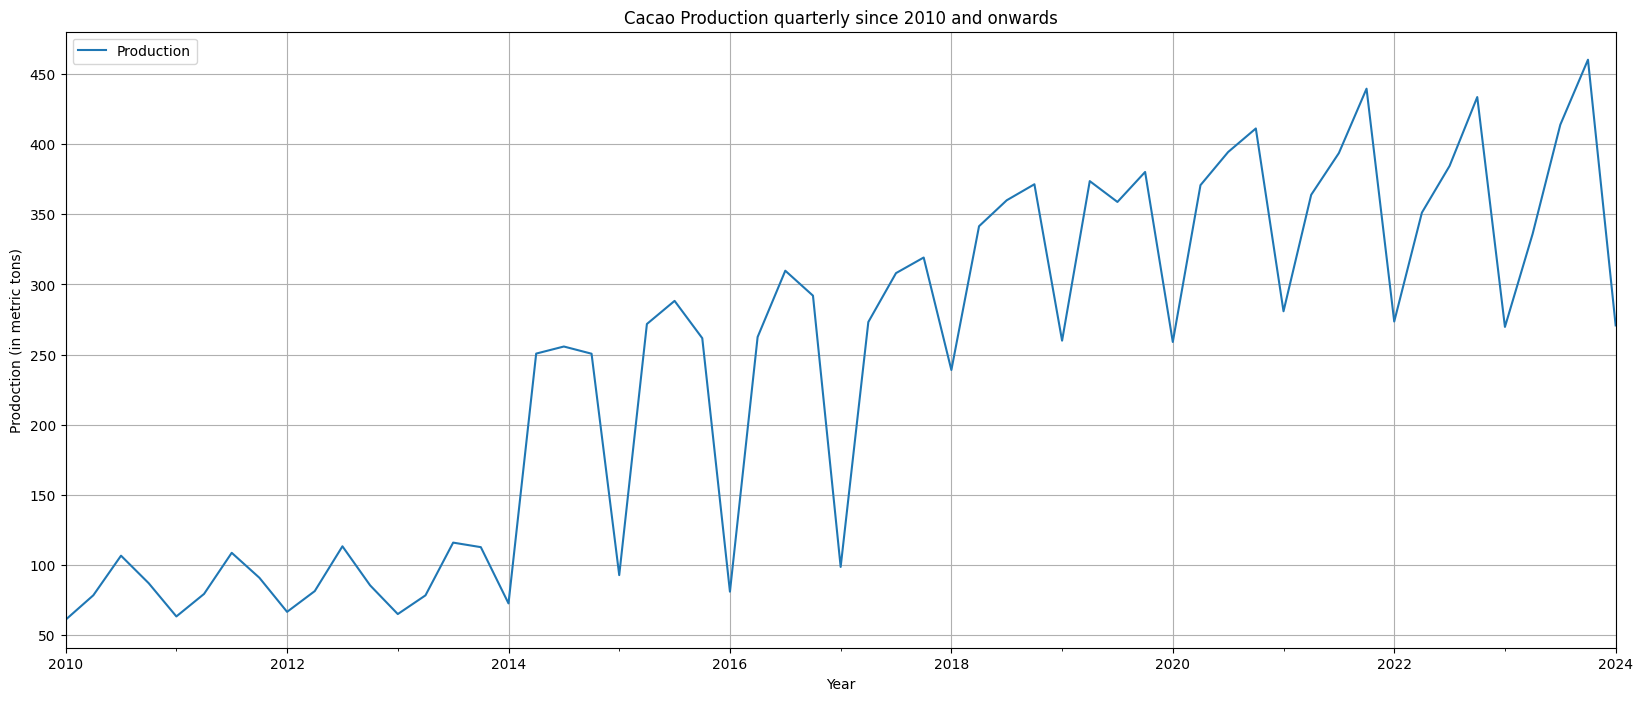

In [7]:
dataframe.plot(figsize=(20,8))
plt.title('Cacao Production quarterly since 2010 and onwards')
plt.xlabel('Year')
plt.ylabel('Prodoction (in metric tons)')
plt.grid();

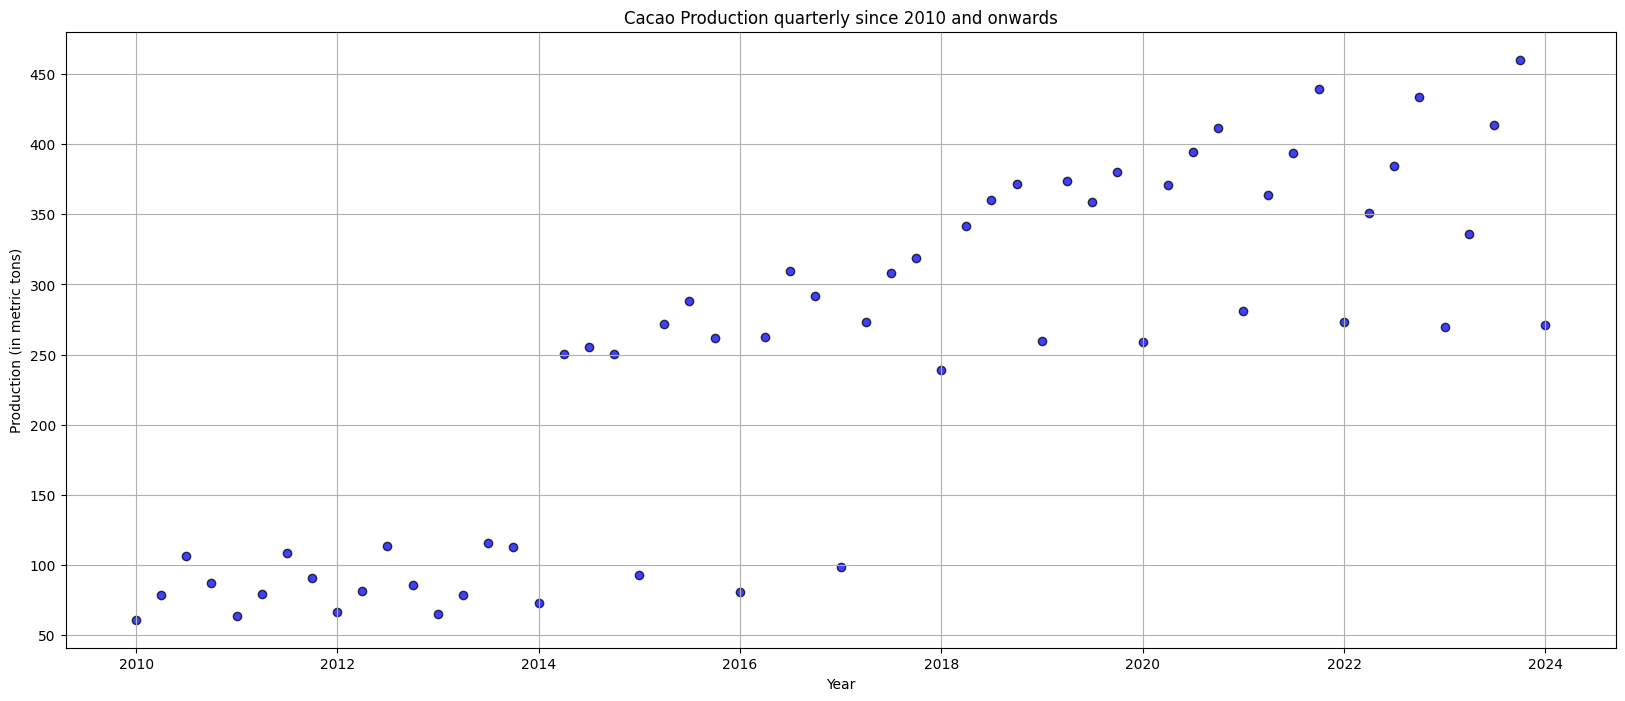

In [8]:
plt.figure(figsize=(20, 8))
plt.scatter(dataframe.index, dataframe['Production'], color='blue', edgecolor='black', linewidth=1, alpha=0.75) 
plt.title('Cacao Production quarterly since 2010 and onwards')
plt.xlabel('Year')
plt.ylabel('Production (in metric tons)')
plt.grid(True)
plt.show()


In [9]:
round(dataframe.describe(), 3)

,Production
count,57.000
mean,243.410
std,127.152
min,60.920
25%,98.570
50%,269.740
75%,358.860
max,460.290


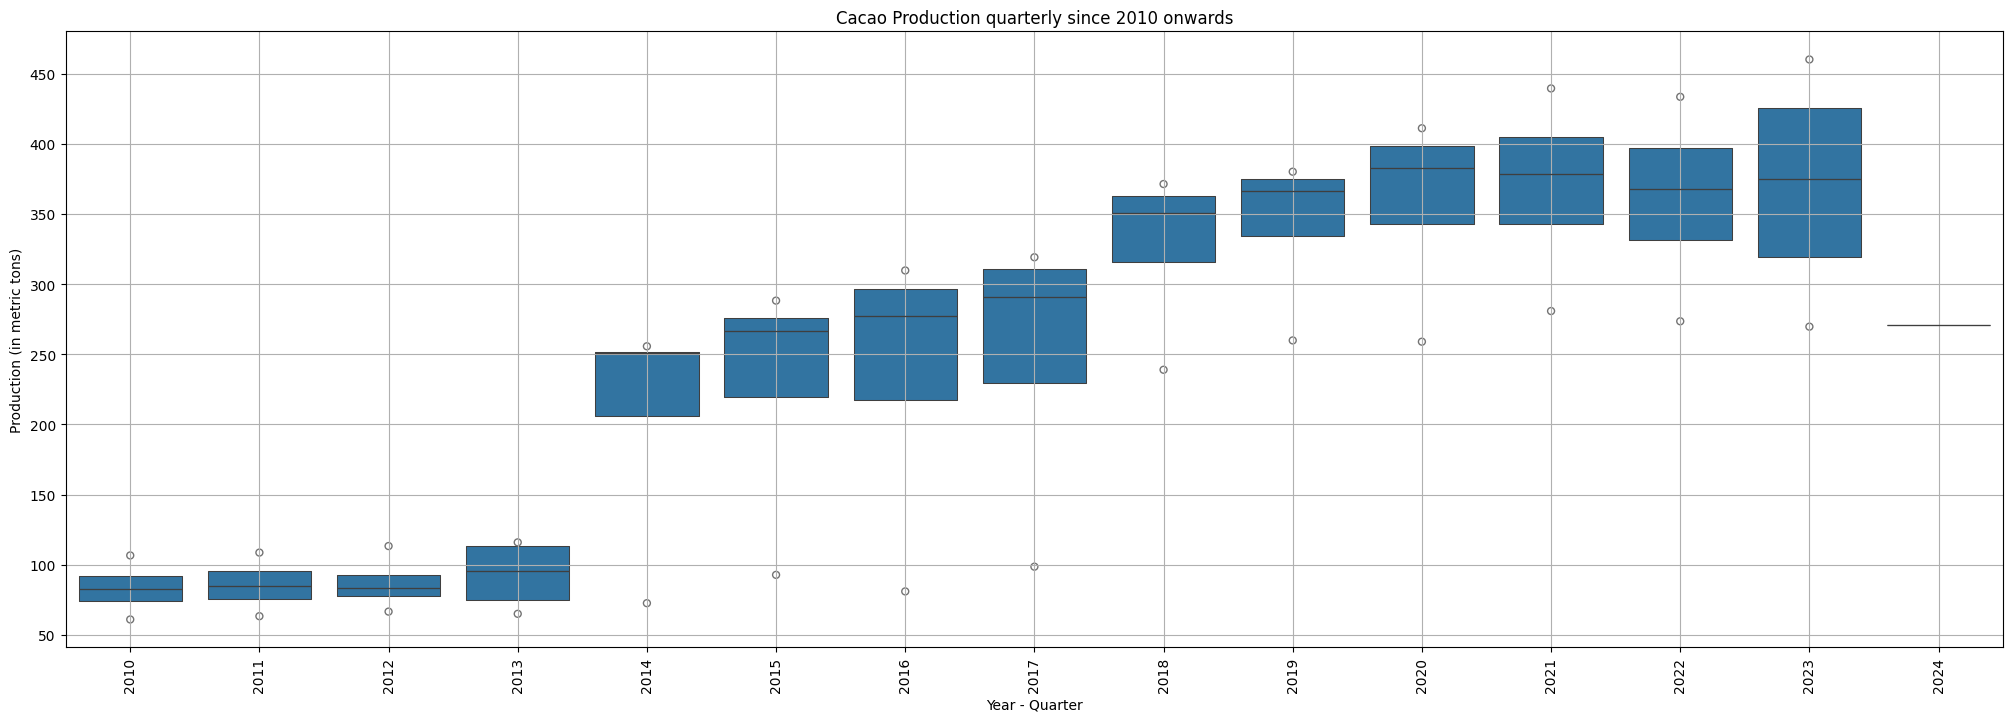

In [10]:
_, ax = plt.subplots(figsize=(25, 8))
sns.boxenplot(x = dataframe.index.year, y = dataframe.values[:,0], ax = ax)
plt.title('Cacao Production quarterly since 2010 onwards')
plt.xlabel('Year - Quarter')
plt.ylabel('Production (in metric tons)')
plt.xticks(rotation=90)
plt.grid();

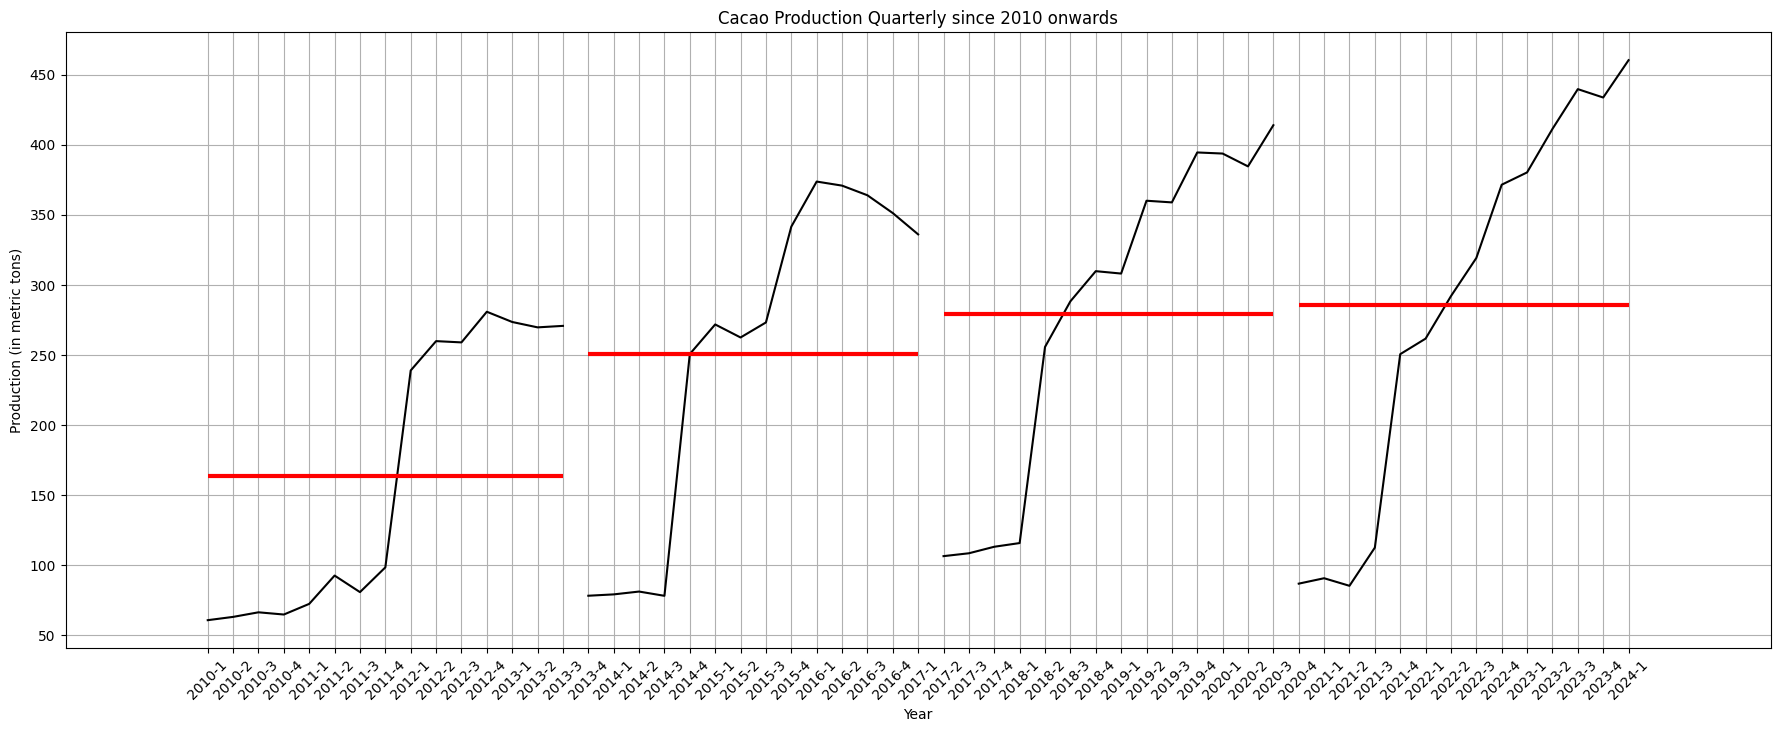

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import quarter_plot

fig, ax = plt.subplots(figsize=(22, 8))
quarter_plot(dataframe, ylabel='Cacao Production', ax=ax)

# Set title and labels
plt.title('Cacao Production Quarterly since 2010 onwards')
plt.xlabel('Year')
plt.ylabel('Production (in metric tons)')

# Customize x-axis ticks
ax.set_xticks(range(len(dataframe.index)))  # Adjust to match the number of data points
ax.set_xticklabels([f'{year}-{quarter}' for year, quarter in zip(dataframe.index.year, dataframe.index.quarter)], rotation=45)

plt.grid()
plt.show()


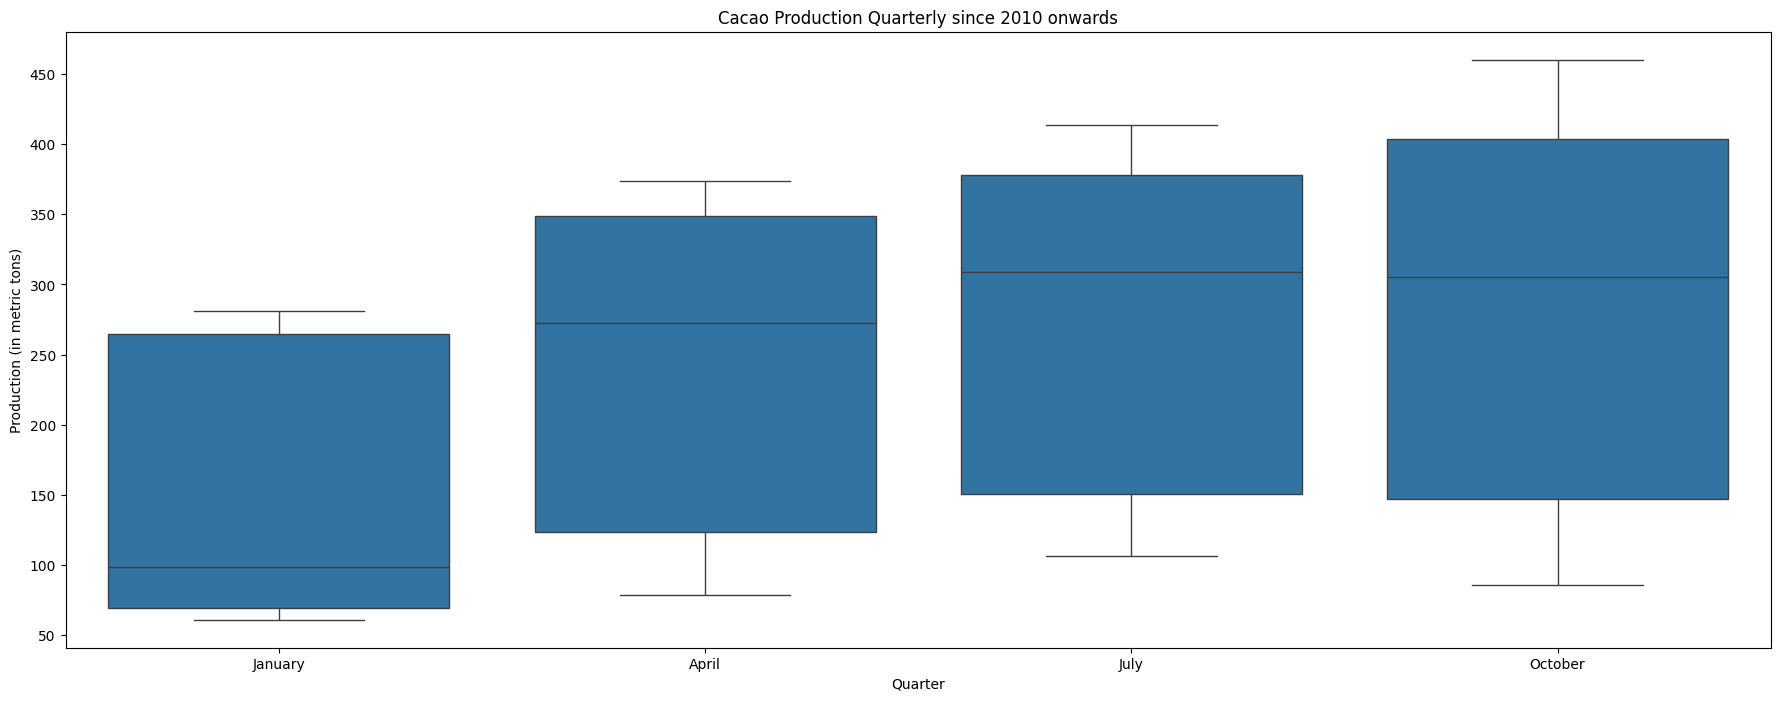

In [12]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot( x = dataframe.index.month_name(), y = dataframe.values[:,0], ax = ax)
plt.title('Cacao Production Quarterly since 2010 onwards')
plt.xlabel('Quarter')
plt.ylabel('Production (in metric tons)')
plt.show();

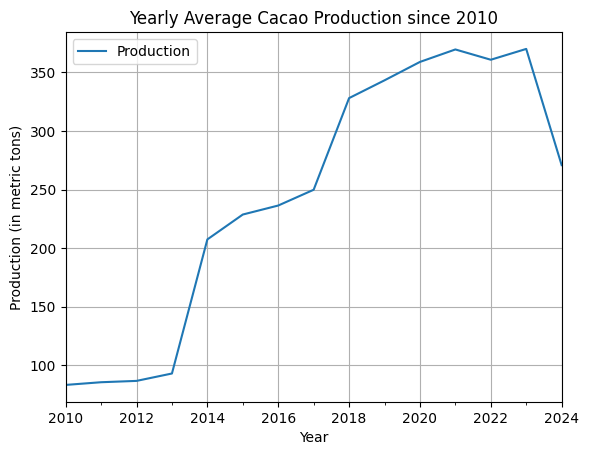

In [13]:
dataframe_yearly_sum = dataframe.resample('A').mean()
dataframe_yearly_sum.plot();
plt.title('Yearly Average Cacao Production since 2010')
plt.xlabel('Year')
plt.ylabel('Production (in metric tons)')
plt.grid();


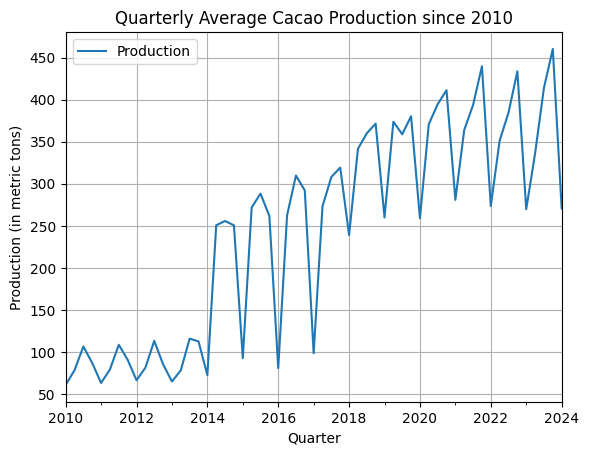

In [14]:
dataframe_quarterly_sum = dataframe.resample('Q').mean()
dataframe_quarterly_sum.plot();
plt.title('Quarterly Average Cacao Production since 2010')
plt.xlabel('Quarter')
plt.ylabel('Production (in metric tons)')
plt.grid();

Decade (10years)

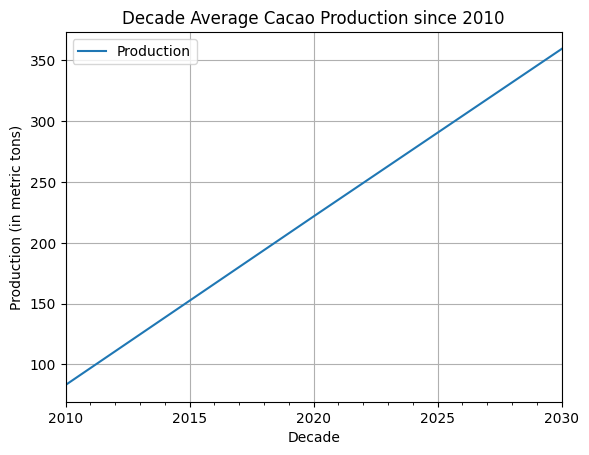

In [15]:
dataframe_decade_sum = dataframe.resample('10Y').mean()
dataframe_decade_sum.plot();
plt.title('Decade Average Cacao Production since 2010')
plt.xlabel('Decade')
plt.ylabel('Production (in metric tons)')
plt.grid();

In [16]:
dataframe_1 = dataframe.groupby(dataframe.index.year).mean().rename(columns={'Production':'Mean'})
dataframe_1 = dataframe_1.merge(dataframe.groupby(dataframe.index.year).std().rename(columns={'Production':'Std'}), left_index=True, right_index=True)
dataframe_1['Cov_pct'] = ((dataframe_1['Std']/dataframe_1['Mean'])*100).round(2)
dataframe_1.head()

,Mean,Std,Cov_pct
Quarter,,,
2010,83.2075,18.984429,22.82
2011,85.5075,19.116653,22.36
2012,86.6425,19.525726,22.54
2013,92.9550,25.264966,27.18
2014,207.4125,89.940351,43.36


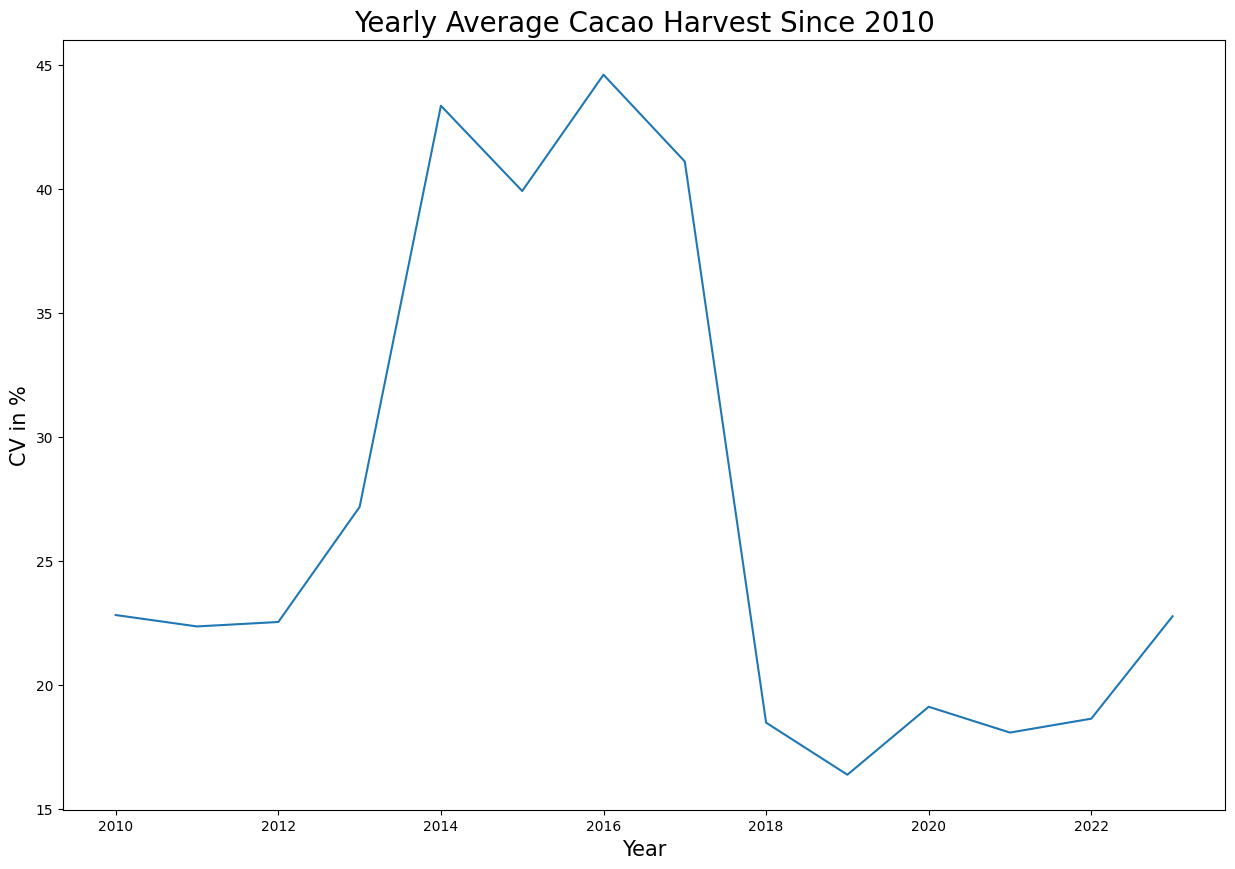

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
dataframe_1['Cov_pct'].plot();
plt.title('Yearly Average Cacao Harvest Since 2010', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('CV in %', fontsize=15)
plt.show();

# **Training and Predicting Model**

In [39]:
train = dataframe[dataframe.index.year <= 2021]
test = dataframe[dataframe.index.year > 2021]

In [40]:
print(train.shape)
print(test.shape)

(48, 1)
(9, 1)


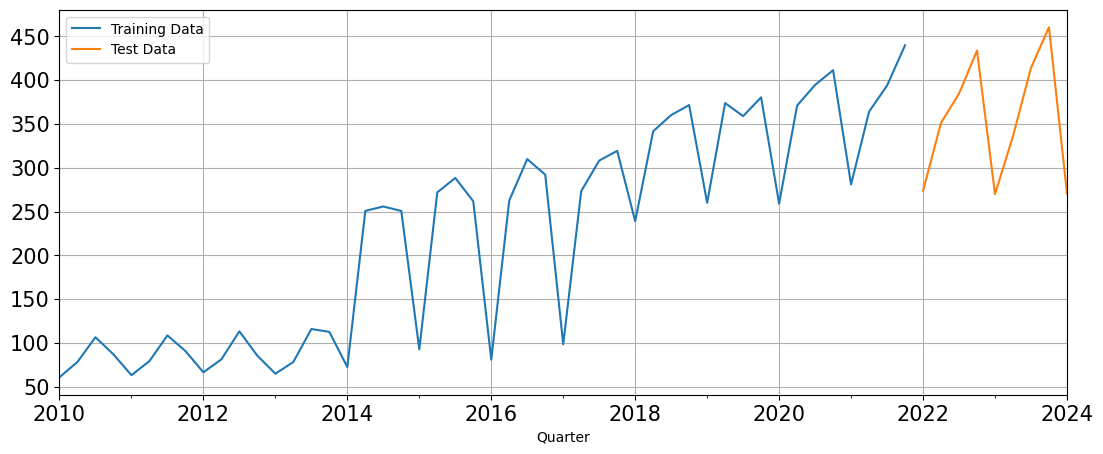

In [41]:
train['Production'].plot(figsize=(13,5), fontsize = 15)
test['Production'].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(48, 9)

In [43]:
LR_train = train.copy()
LR_test = test.copy()

In [44]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [45]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Production'].values)

LinearRegression()

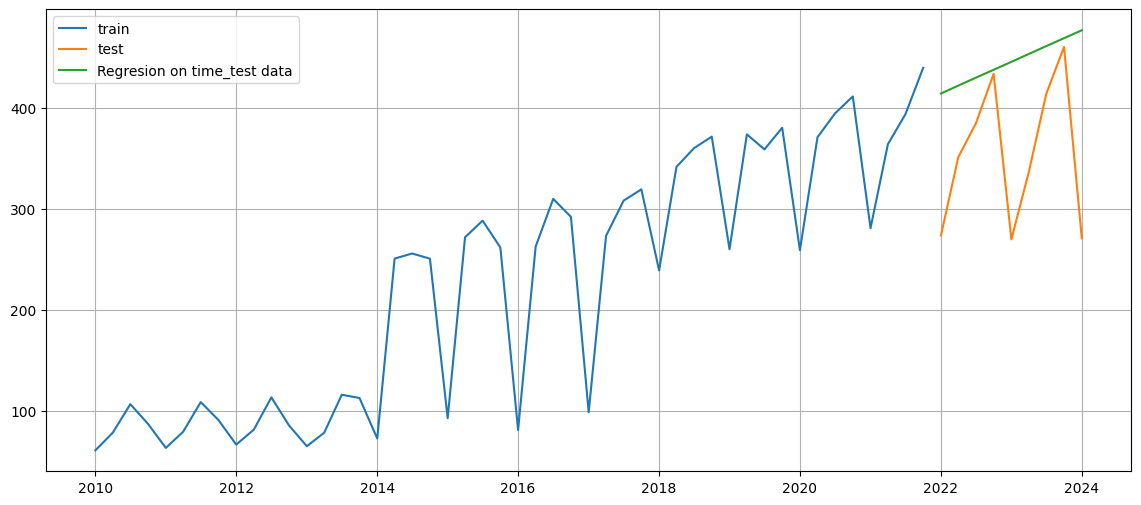

In [46]:
test_prediction_model1 = lr.predict(LR_test[['time']])
LR_test['Forcast'] = test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Production'], label = 'train')
plt.plot(test['Production'], label = 'test')
plt.plot(LR_test['Forcast'], label = 'Regresion on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [47]:
def mape(actual, pred):
    return round((np.mean(abs(actual- pred)/actual))*100, 2)

In [48]:
mape_model1_test = mape(test['Production'].values,test_prediction_model1)
print('MAPE is %3.3f'%(mape_model1_test),'%')

MAPE is 30.400 %


### **What is MAPE?**

**MAPE is a measure of accuracy for a forecasting method in terms of the percent of error. It is calculated as the average of the absolute percentage error for a set of forecasts.**



In [49]:
results = pd.DataFrame({'Test Mape (%)' : [mape_model1_test]}, index=['RegressionOnTime'])
results

,Test Mape (%)
RegressionOnTime,30.4


In [50]:
Naive_train = train.copy()
Naive_test = test.copy()

In [51]:
Naive_test['naive'] = np.asarray(train['Production'])[len(np.asarray(train['Production']))-1]
Naive_test['naive'].head()

Quarter
2022-01-01    439.64
2022-04-01    439.64
2022-07-01    439.64
2022-10-01    439.64
2023-01-01    439.64
Name: naive, dtype: float64

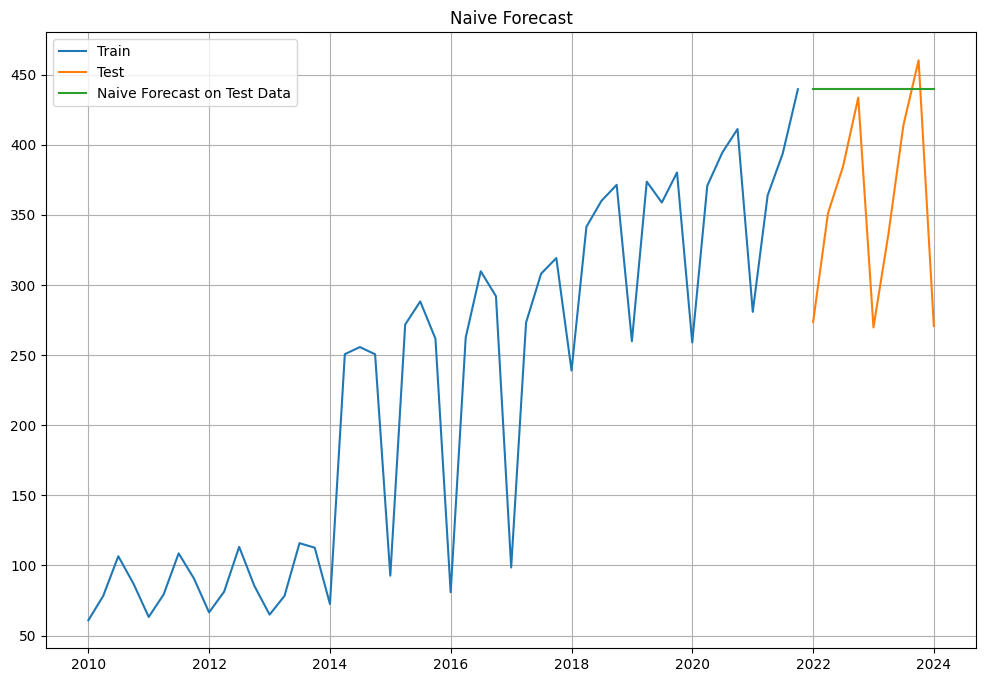

In [52]:
plt.figure(figsize=(12, 8))
plt.plot(Naive_train['Production'], label = 'Train')
plt.plot(test['Production'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid()

In [53]:
mape_model2_test = mape(test['Production'].values,Naive_test['naive'].values)
print("For Naive forcast on the Test Data, MAPE is %3.3f" %(mape_model2_test), "%")

For Naive forcast on the Test Data, MAPE is 29.830 %


In [54]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])
results = pd.concat([results, resultsDf_2])
results

,Test Mape (%),Test MAPE (%)
RegressionOnTime,30.4,NaN
NaiveModel,NaN,29.83


In [55]:
final_model = ExponentialSmoothing(dataframe,
                                   trend = 'additive',
                                   seasonal = 'additive').fit(smoothing_level = 0.4,
                                                              smoothing_trend = 0.3,
                                                              smoothing_seasonal = 0.6)

In [56]:
Mape_final_model = mape(dataframe['Production'].values, final_model.fittedvalues)
print('MAPE:', Mape_final_model)

MAPE: 11.46


In [57]:
predictions = final_model.forecast(steps=len(test))

In [58]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                         'prediction': predictions,
                         'upper_CI': predictions + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2024-04-01,277.446456,355.335490,433.224523
2024-07-01,346.533694,424.422727,502.311761
2024-10-01,386.244816,464.133850,542.022883
2025-01-01,211.909689,289.798723,367.687756
2025-04-01,286.112311,364.001345,441.890378


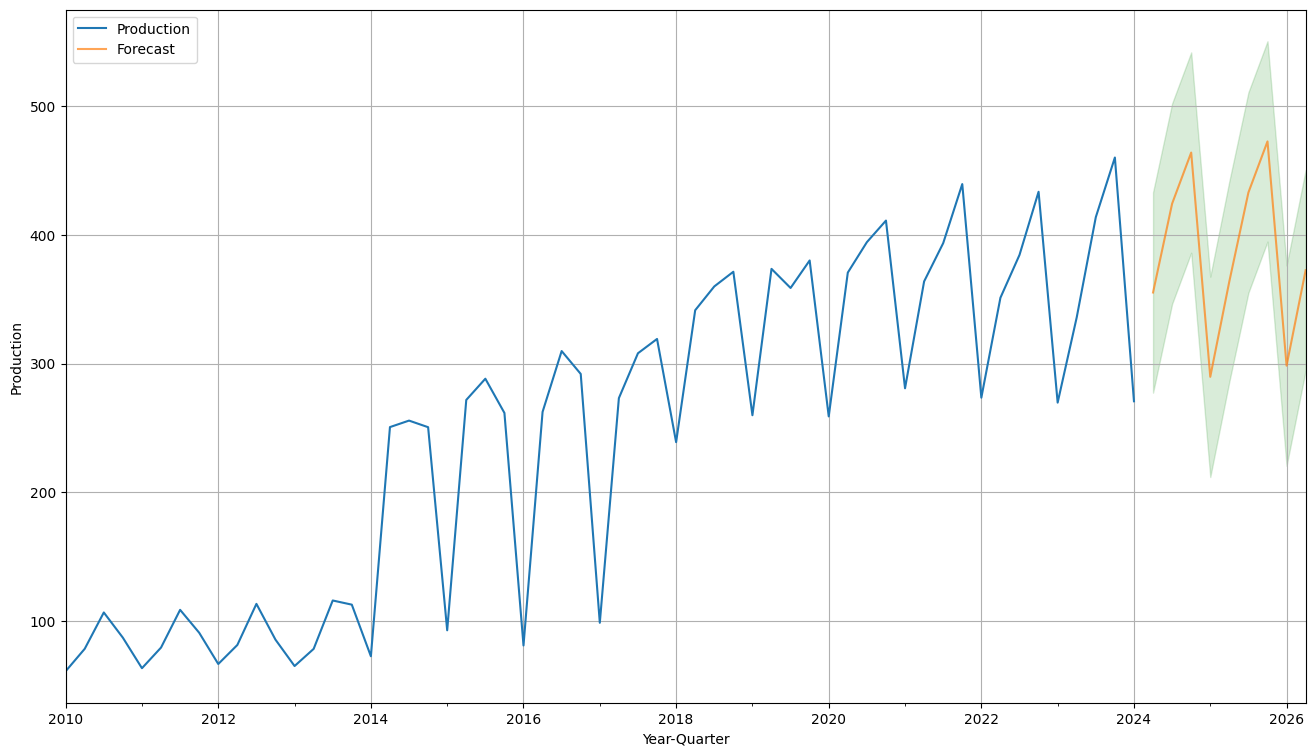

In [59]:
axis = dataframe.plot(label = 'Actual', figsize = (16,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.7)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'g', alpha = 0.15)
axis.set_xlabel('Year-Quarter')
axis.set_ylabel('Production')
plt.legend(loc = 'best')
plt.grid()
plt.show()


# **End of Predicting**